In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [27]:

df = pd.DataFrame(columns=["Title","Location","Company","Salary","Sponsored","Summary"])
# send a get request to this URL; get the contents and parse it using BS4
for start in range (0,500,10):# results from 500 pages.
    URL = "https://www.indeed.co.in/jobs?q=data+science&l=India&start="+str(start)

    response = requests.get(URL)
    soup = BeautifulSoup(response.content, 'html.parser')



    all_job = soup.find_all("div", attrs={'class':'result'})
    # got title,location, company, salary, sponsored from the "class" of HTML text.
    for job in all_job:
        try:
            title = job.find("div", class_="title").text.strip()
        except:
            title = 'None'
        try:
            location = job.find("div", class_="location").text.strip()

        except:
            location = 'None'
        try:
            company = job.find(class_="company").text.strip()

        except:
            company = 'None'

        try:
            salary = job.find(class_="salary").text.strip()

        except:
            salary = 'None'

        try:
            sponsored = job.find(class_="sponsoredGray").text.strip()

        except:
            sponsored = 'None'


        df = df.append({"Title":title,"Location":location, "Company":company,"Salary":salary,"Sponsored":sponsored}, ignore_index=True)

    print("these many results: ", df.shape)

df.to_csv("Datascience.csv", index = False)
    # save the file





these many results:  (16, 6)
these many results:  (32, 6)
these many results:  (48, 6)
these many results:  (64, 6)
these many results:  (80, 6)
these many results:  (96, 6)
these many results:  (112, 6)
these many results:  (128, 6)
these many results:  (144, 6)
these many results:  (160, 6)
these many results:  (176, 6)
these many results:  (192, 6)
these many results:  (207, 6)
these many results:  (222, 6)
these many results:  (237, 6)
these many results:  (252, 6)
these many results:  (267, 6)
these many results:  (283, 6)
these many results:  (298, 6)
these many results:  (314, 6)
these many results:  (330, 6)
these many results:  (345, 6)
these many results:  (361, 6)
these many results:  (377, 6)
these many results:  (391, 6)
these many results:  (405, 6)
these many results:  (419, 6)
these many results:  (433, 6)
these many results:  (447, 6)
these many results:  (461, 6)
these many results:  (475, 6)
these many results:  (489, 6)
these many results:  (503, 6)
these many resul

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("C:\\Users\\Dimpalbabu\\Datascience.csv")
df.head()

,Title,Location,Company,Salary,Sponsored,Summary
0,Data Science modelers,"Bengaluru, Karnataka",Infosys,None,Hot Job,NaN
1,"Analyst, Investment Performance (SQL/Tableau/D...","Gurgaon, Haryana",BlackRock,None,Hot Job,NaN
2,Data Scientist,"Bengaluru, Karnataka",Micro Focus,None,Hot Job,NaN
3,"Production Operations Systems, Associate","Gurgaon, Haryana",BlackRock,None,Hot Job,NaN
4,Data Science/ Machine Learning & AI Trainer,None,Digital Acharya,"₹5,00,000 a year",None,NaN


In [30]:
df.shape

(763, 6)

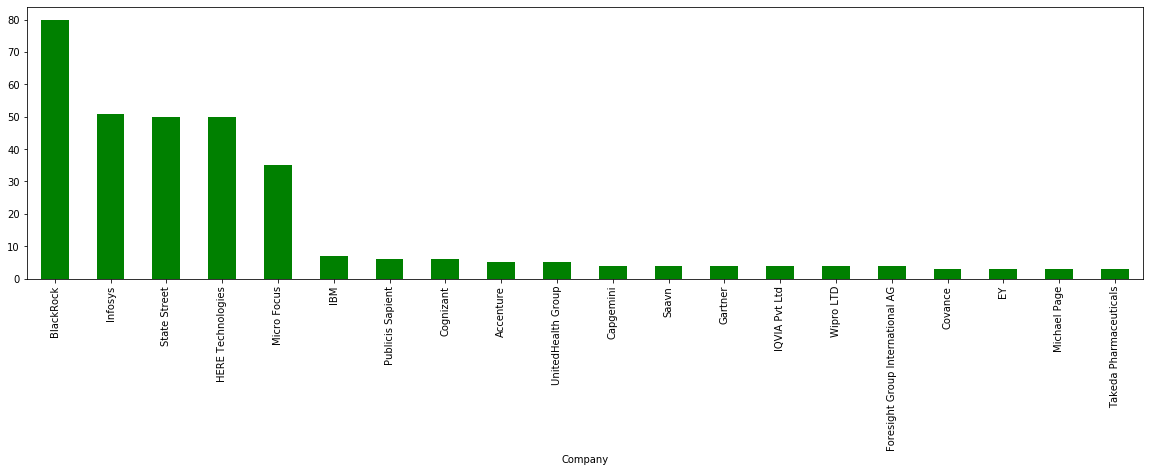

In [53]:
counts = df.groupby("Company").count()["Title"].sort_values(ascending = False)[:20]
counts.plot("bar",color = 'green', figsize=(20,5));